# Star Wars Survey Analysis

In this project, we will be analyzing survey data asking respondents about their opinions on Star Wars films. The dataset we use can be found [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). We'll clean and explore the survey data to see if we can find any interesting patterns. 

## 1. Reading and Cleaning the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


star_wars = pd.read_csv("./star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
print(star_wars.iloc[0,15:28].unique())
print(star_wars.columns)
print(star_wars.shape)

['Han Solo' 'Luke Skywalker' 'Princess Leia Organa' 'Anakin Skywalker'
 'Obi Wan Kenobi' 'Emperor Palpatine' 'Darth Vader' 'Lando Calrissian'
 'Boba Fett' 'C-3P0' 'R2 D2' 'Jar Jar Binks' 'Padme Amidala']
Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 

### Column Information

The survey asks the respondents several questions about their demographic such as gender, age, income and education. This information will allow us to see if any particular groups show inclinations towards certain Star Wars films. There are questions involving checkboxes, where respondents pick Star Wars films they've watched and liked. We will need to clean this data so we can represent it through columns.

### Remove null values

Any row with a null `RespondentID` is invalid and should be removed. 

In [3]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])] 

### Cleaning Checkboxes 

Two questions asked have yes/no checkboxes - `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?`. We want to map these responses to `TRUE` or `FALSE` so they will be easier for analysis.

For the checkboxes where respondents are asked if they have seen a specific Star Wars film, we similarly map the value to `TRUE` if yes and `FALSE` if no. Currently, the values in each of these columns is the title of the film if respondents have seen it and `NaN` if they have not. We also rename the columns to `seen_n` where `n` is the episode number of each film. 

For the checkboxes where respondents are asked to rank the films from 1st to 6th, we assign the float value that matches up with the ranking to each column. We also rename the columns to `ranking_n` where `n` is the episode number of each film. 

In [4]:
# Check none of the responses are null
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts())

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [5]:
# Define mapping for responses
yes_no = {
    "Yes": True, 
    "No": False
}

# Perform mapping on our two questions
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [6]:
# Check mapping
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [7]:
# Make movie columns Boolean

movie_columns = star_wars.columns[3:9]
movie_titles = [
    "Star Wars: Episode I  The Phantom Menace", 
    "Star Wars: Episode II  Attack of the Clones", 
    "Star Wars: Episode III  Revenge of the Sith",
    "Star Wars: Episode IV  A New Hope", 
    "Star Wars: Episode V The Empire Strikes Back", 
    "Star Wars: Episode VI Return of the Jedi"
]

for i in range(0,6):
    mapping = {movie_titles[i]: True,
               np.nan: False}
    star_wars[movie_columns[i]] = star_wars[movie_columns[i]].map(mapping)
    star_wars = star_wars.rename(columns={movie_columns[i]:"seen_"+str(i+1)})    

In [8]:
# Cleaning up Ranking Columns

rank_cols = star_wars.columns[9:15]
star_wars[rank_cols] = star_wars[rank_cols].astype(float)

for i in range(0,6):
    star_wars = star_wars.rename(columns={rank_cols[i]:"ranking_"+str(i+1)})
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## 2. Data Analysis

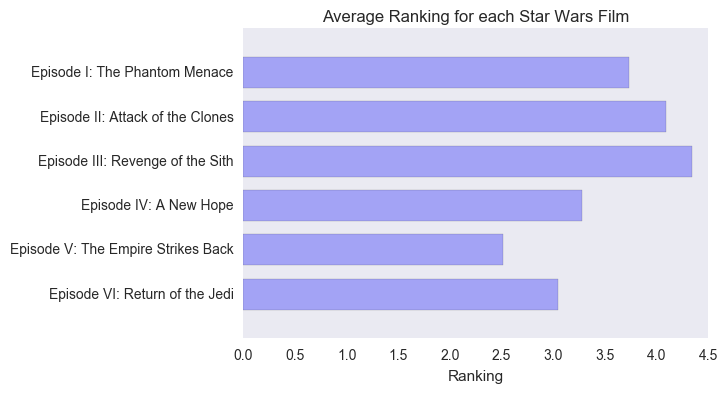

In [9]:
# Find highest and lowest ranked movie
sns.set_style("dark")
fig, ax = plt.subplots()

rankings = star_wars.mean()[8:]
titles = [
    "Episode I: The Phantom Menace", 
    "Episode II: Attack of the Clones", 
    "Episode III: Revenge of the Sith",
    "Episode IV: A New Hope", 
    "Episode V: The Empire Strikes Back", 
    "Episode VI: Return of the Jedi"
]

index = np.arange(len(titles))
height = 0.7

ax.barh(index, rankings[::-1], height, color='b', alpha=0.3, align='center')

ax.set_title("Average Ranking for each Star Wars Film")
ax.set_xlabel("Ranking")

ax.set_yticks(index)
ax.set_yticklabels(titles[::-1])
ax.tick_params(right='off', top='off', left='off')

plt.show()

### Rankings Analysis

Since respondents were asked to rank the movies in order of preference, a lower ranking value is better. The original trilogy is ranked far better than the prequel trilogy with "Episode V: The Empire Strikes Back" being the overall favorite among the respondents with a mean ranking of about 2.5. The least favorite film among the respondents is "Episode III: Revenge of the Sith", which was the latest Star Wars film released at the time this survey was created, with a mean ranking of about 4.3. 

The skew of favor towards the original films might be a sentiment shared across the entire Star Wars fandom, but it might also be influenced by the age of the respondents - older people grew up with the original films, making them more likely to rank them higher than the younger generation. Let's analyze the rankings by age.

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64


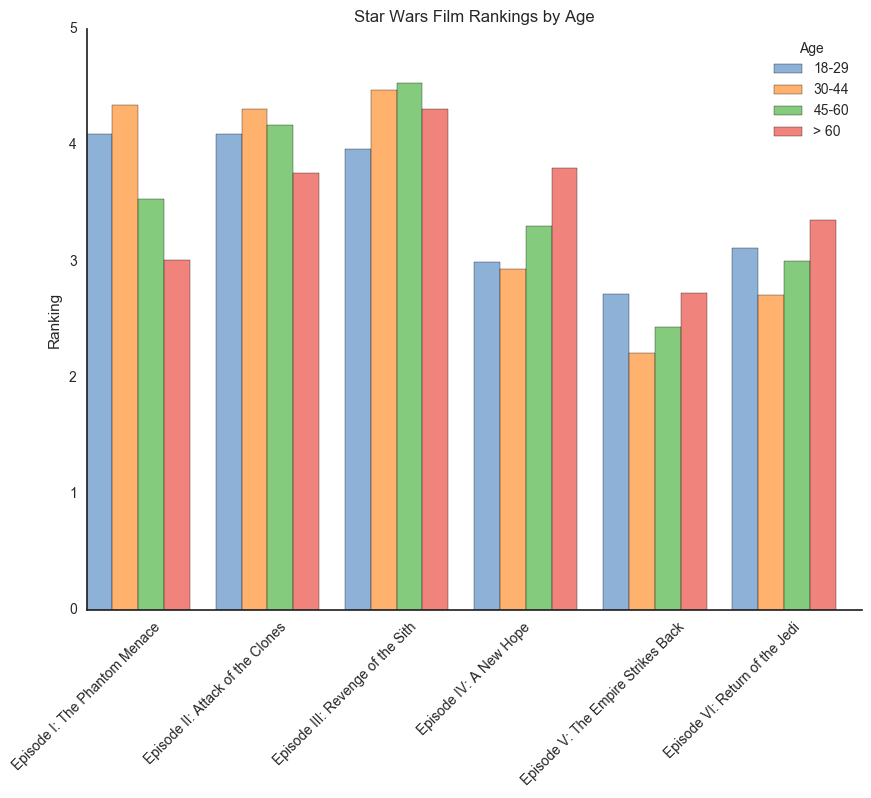

In [10]:
# Ranking by Age

sns.set_style("white")

# Check for statistically relevant sample sizes
print(star_wars["Age"].value_counts())

# Aggregate dataset by age
rankings_by_age = star_wars.groupby("Age").agg(np.mean).iloc[:,8:]
rankings_by_age.reset_index()

# Create lists of rankings for each film by age
age_first = rankings_by_age.iloc[0, :].values
age_second = rankings_by_age.iloc[1, :].values
age_third = rankings_by_age.iloc[2, :].values
age_fourth = rankings_by_age.iloc[3, :].values

# Create figure for barplot
fig, ax = plt.subplots(figsize=(10, 7.5))

ind = np.arange(6)
width = 0.2

# Plot bars
rects_1 = ax.bar(ind, age_first, width, color=(114/255,158/255,206/255), alpha=0.8)
rects_2 = ax.bar(ind+width, age_second, width, color=(255/255,158/255,74/255), alpha=0.8)
rects_3 = ax.bar(ind+2*width, age_third, width, color=(103/255,191/255,92/255), alpha=0.8)
rects_4 = ax.bar(ind+3*width, age_fourth, width, color=(237/255,102/255,93/255), alpha=0.8)

# Set axis properties
ax.set_title("Star Wars Film Rankings by Age")
ax.set_ylabel("Ranking")
ax.set_xticks(ind)
ax.set_xticklabels(titles, rotation=45)

# Remove ticks and spines
ax.tick_params(top='off', right='off', left='off', bottom='off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set labels for legend
ax.legend((rects_1[0], rects_2[0], rects_3[0], rects_4[0]), ('18-29', '30-44', '45-60', '> 60'), title="Age")

# If you wish to save plot
# plt.savefig("star_wars_age.png", bbox_inches="tight", dpi=fig.dpi)

plt.show()


### Observations by Age

The group that favored the original films the most was the second youngest (30-44) - respondents in this group gave the best rankings on average to each of the original films. Now, the group that favored the original films the least was actually the oldest (> 60), which comes as a surprise since I expected older people to rank these films higher. On the whole though, respondents of all ages favored the older movies. 

Female    549
Male      497
Name: Gender, dtype: int64


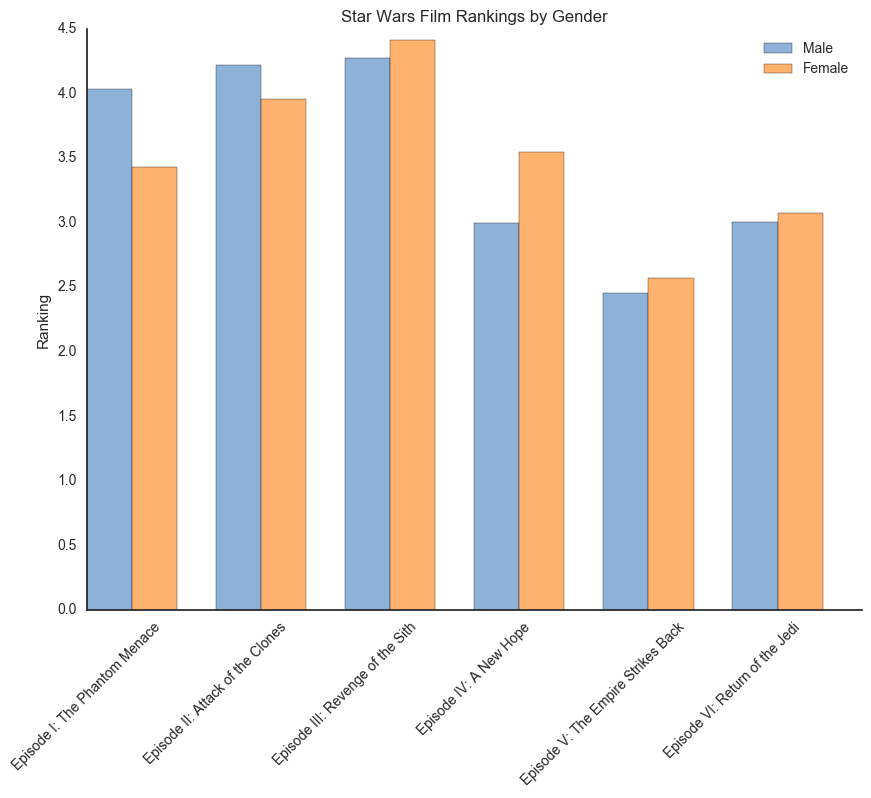

In [11]:
# Male v Female rankings
print(star_wars["Gender"].value_counts())

males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

male_ranks = males.mean()[8:]
female_ranks = females.mean()[8:]

fig, ax = plt.subplots(figsize=(10, 7.5))

ind = np.arange(6)
width = 0.35

rects_1 = ax.bar(ind, male_ranks, width, color=(114/255,158/255,206/255), alpha=0.8)
rects_2 = ax.bar(ind+width, female_ranks, width, color=(255/255,158/255,74/255), alpha=0.8)

ax.set_title("Star Wars Film Rankings by Gender")
ax.set_ylabel("Ranking")
ax.set_xticks(ind)
ax.set_xticklabels(titles, rotation=45)

ax.tick_params(top='off', right='off', left='off', bottom='off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend((rects_1[0], rects_2[0]), ('Male', 'Female'))

plt.show()

### Observations by Gender

For most of the films, there isn't a huge difference in the rankings given by either gender. 

### Other Demographics

The trend in rankings given by our original plot is generally followed across all ages and genders. In order to see if the trend is followed by other demographic factors, we will break down the dataset by income, location and education and then compare each subset of respondents' rankings to the trend. We use a margin of error of 0.25 so that minor differences from the trend are not accounted for. 

In [12]:
# Create subsets for income, location and education 
rankings_by_income = star_wars.groupby("Household Income").agg(np.mean).iloc[:,8:]
rankings_by_location = star_wars.groupby("Location (Census Region)").agg(np.mean).iloc[:,8:]
rankings_by_education = star_wars.groupby("Education").agg(np.mean).iloc[:,8:]


def follows_trend(row):
    a, b, c, d, e, f = (row[c] for c in ("ranking_5", "ranking_6", "ranking_4", "ranking_1", "ranking_2", "ranking_3")) # Trend order
    trend = None
    if a <= b <= c <= d <= e <= f:
        trend = True        
    elif (a-b<.25) and (b-c<.25) and (c-d<.25) and (d-e<.25) and (e-f<.25):
        trend =  True
    else:
        trend = False
    return trend

# Apply function to each subset
income_trend = rankings_by_income.apply(follows_trend, axis=1)
print(income_trend)
location_trend = rankings_by_location.apply(follows_trend, axis=1)
print(location_trend)
education_trend = rankings_by_education.apply(follows_trend, axis=1)
print(education_trend)


Household Income
$0 - $24,999           True
$100,000 - $149,999    True
$150,000+              True
$25,000 - $49,999      True
$50,000 - $99,999      True
dtype: bool
Location (Census Region)
East North Central     True
East South Central     True
Middle Atlantic        True
Mountain               True
New England            True
Pacific                True
South Atlantic         True
West North Central     True
West South Central    False
dtype: bool
Education
Bachelor degree                      True
Graduate degree                      True
High school degree                   True
Less than high school degree        False
Some college or Associate degree     True
dtype: bool


Nearly every subset followed the trend of rankings. The only two that did not were people from the West South Central US and those with less than a high school degree. 

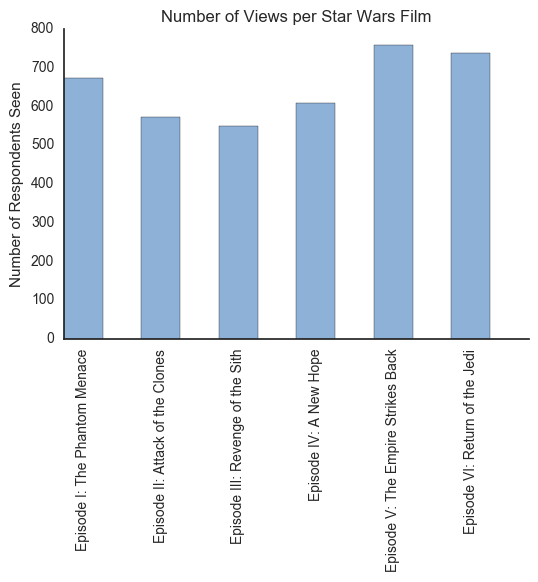

In [13]:
# Most Seen Movie
seen_cols = star_wars.sum()[2:8]

fig, ax = plt.subplots()

ind = np.arange(6)
width = 0.5

ax.bar(ind, seen_cols, width, color=(114/255,158/255,206/255), alpha=0.8)

ax.set_title("Number of Views per Star Wars Film")
ax.set_ylabel("Number of Respondents Seen")
ax.set_xticks(ind+width/2)
ax.set_xticklabels(titles, rotation=90)

ax.tick_params(top='off', right='off', left='off', bottom='off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

The older films have more views, which makes sense since our survey consists largely of Star Wars fans, most of whom would have watched the original trilogy. 

### Character Preferences

In addition to asking respondents to rank the six Star Wars films, the survey also asked them to rate a variety of characters. These ratings range from `Very unfavorably` to `Very unfavorably`, which we will convert to a 1-5 scale. For each character, we convert their ratings into numeric values and then we will see how the ratings are distributed. We also rename the columns in our dataset to the respective character being rated. 

In [15]:
character_map = {
    "Very favorably":5,
    "Somewhat favorably":4,
    "Neither favorably nor unfavorably (neutral)":3,
    "Somewhat unfavorably":2,
    "Very unfavorably":1
}

characters = [
    "Han Solo", 
    "Luke Skywalker", 
    "Princess Leia Organa", 
    "Anakin Skywalker", 
    "Obi Wan Kenobi", 
    "Emperor Palpatine", 
    "Darth Vader",
    "Lando Calrissian",
    "Boba Fett",
    "C-3PO",
    "R2-D2",
    "Jar Jar Binks",
    "Padme Amidala",
    "Yoda"
]

character_columns = star_wars.columns[15:29]

for i in range(0,14):
    star_wars[character_columns[i]] = star_wars[character_columns[i]].map(character_map)
    star_wars = star_wars.rename(columns={character_columns[i]:characters[i]})    

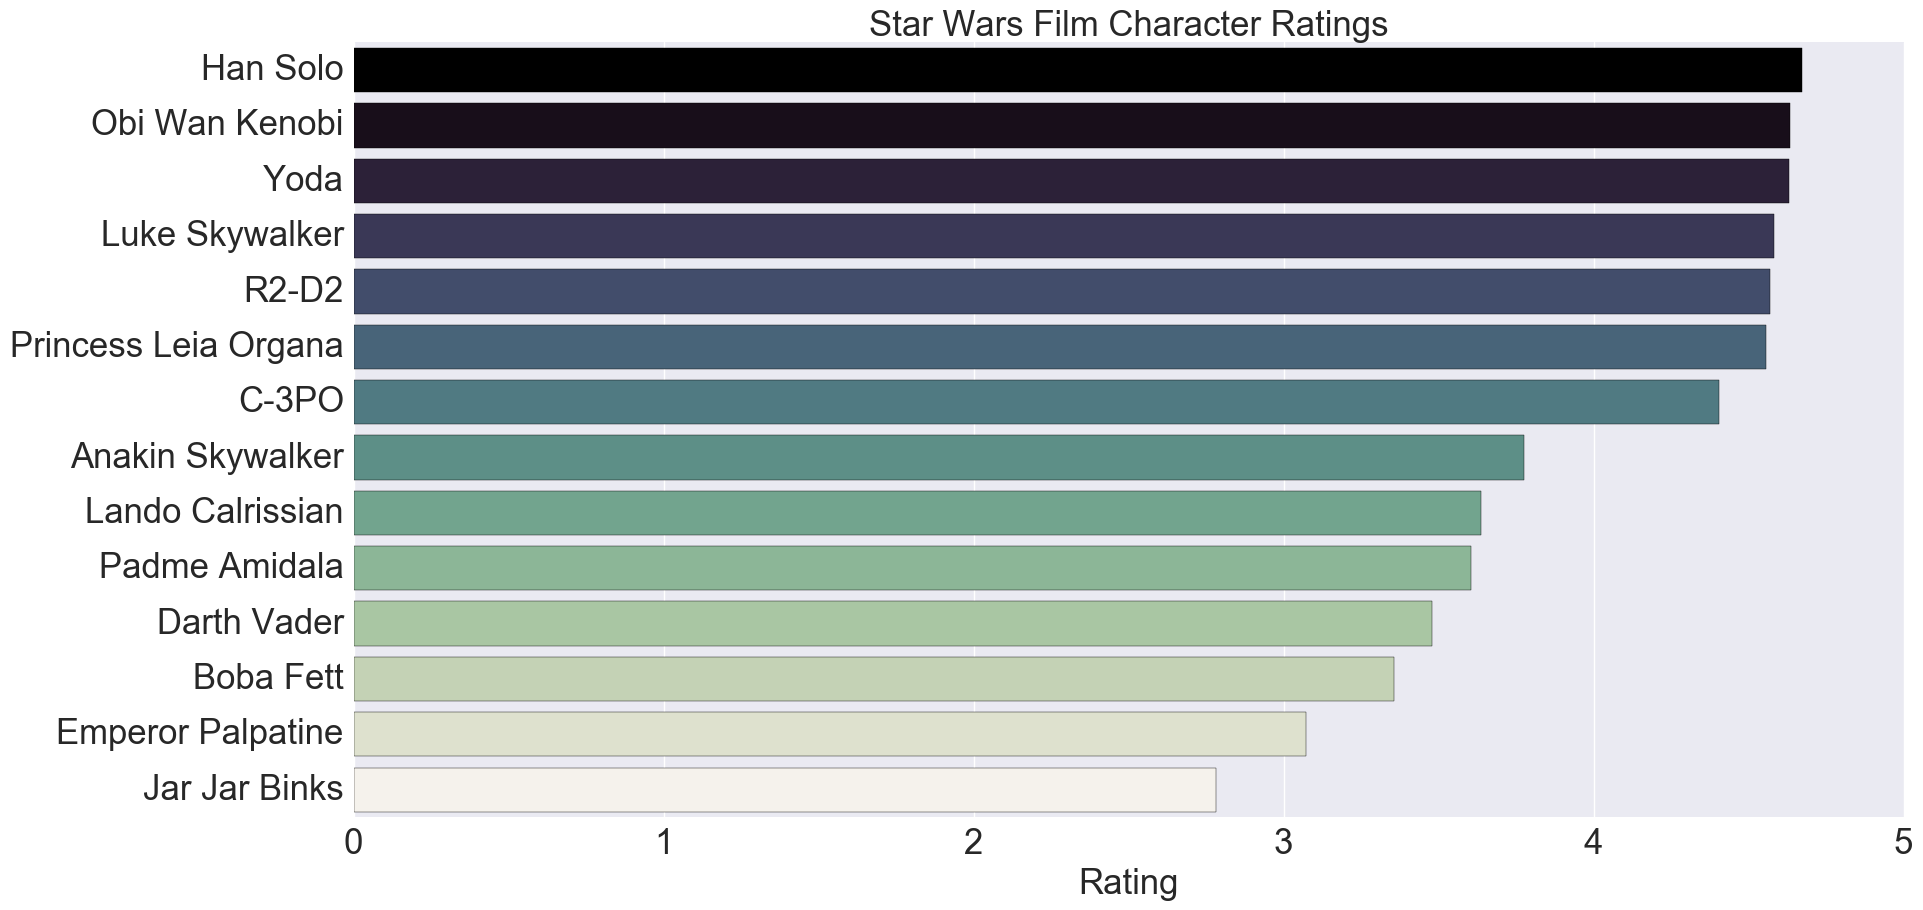

In [34]:
character_rankings = star_wars.iloc[:,15:29].apply(np.mean).sort_values(ascending=False)


rc={'xtick.labelsize': 25, 'ytick.labelsize': 25, 'axes.labelsize': 25, 'font.size': 25, 
    'legend.fontsize': 25.0, 'axes.titlesize': 25, "figure.figsize": [20, 10]}
sns.set(rc)
sns.set_palette(sns.cubehelix_palette(14, start=.5, rot=-.75, dark=0, light=.95, reverse=True))
g = sns.barplot(character_rankings, character_rankings.index)
g.set(xlabel = "Rating", title = "Star Wars Film Character Ratings")

On the whole, fans favor Jedi/non-Sith characters more than those on the Dark Side. A non-Jedi, Han Solo, tops the list, barely beating our Obi Wan Kenobi (everyone's favorite Jedi). In fact, all of the ratings are fairly close at the top of the list until we get to Anakin Skywalker. The two most prominent Sith characters, Darth Vader and Emperor Palpatine are at the bottom of the ratings list. Unfortunately, Jar Jar Binks was rated as the least favorite character (this guy can't catch a break anywhere). 

## 3. Conclusions

* People prefer the original trilogy over the more recently released prequel trilogy. This trend is generally followed across age, gender, income, education and location. 
* Surprisingly, people 45 and older tended to rank the prequel trilogy higher than the younger generations. 
* The Jedi and non-Sith characters are highly favored over their Dark Side counterparts, although Jar Jar Binks bottoms out the ratings list. 
* Released over 15 years later than the original trilogy, the prequel films were done in a new style, as creators had the ability to add more complex CGI effects. Whether it was the addition of new cast or modernized film-making, something about the original films clicked more with our respondents than the prequel films.  